In [1]:
import heeps
from heeps.contrast.psf_off_template import psf_off_template
import numpy as np
np.seterr(divide = 'ignore', invalid='ignore') 
import matplotlib.pyplot as plt
%matplotlib inline

### SCAO only

In [2]:
conf = dict(
    band = 'L',
    mode = 'RAVC',
    dir_current = '$HOME/heeps_metis',  # specify a directory
    nframes = 100,                       # number of SCAO phase screens selected
    f_phase = 'wavefront/COMPASS_201810_RandomWind_100screens_meters.fits',
    f_pupil = 'pupil/ELT_fullM1.fits',  # entrance pupil file
    ravc_calc = False,
    add_phase = False,
)
conf = heeps.config.read_config(verbose=False, **conf)
conf = heeps.config.update_config(saveconf=True, verbose=True, **conf) 
wf = heeps.pupil.pupil(savefits=True, verbose=True, **conf)

Simulation config: band=L, mode=RAVC
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   loading vortex back-propagation params
   vc_charge=2, ngrid=1024, diam_norm=1.0838, beam_ratio=0.2568
   ravc_calc=False, ravc_t=0.7909, ravc_r=0.5190
   npupil=285, pscale=5.4700 mas, lam=3.8112E-06 m
   hfov=1.1 arcsec (-> ndet=403, 51.74 lam/D)

Entrance pupil: loaded from 'ELT_fullM1.fits'
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾


Create single off-axis PSF
   apply ring apodizer: ravc_t=0.7909, ravc_r=0.519, apo_misalign=None
   apply Lyot stop: circ_ext/int=[True, True], ls_dRext/int/spi=[0.0477, 0.02, 0.0249], ls_misalign=None
   extract PSF on the detector: ndet=403
fwhm=3.37pix, ap_flux=7.02e-02


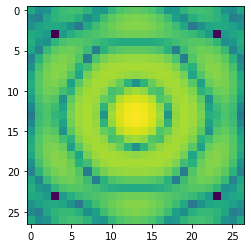

In [3]:
psf = heeps.wavefront.propagate_one(wf, onaxis=False, savefits=True, 
    verbose=True, **conf)
psf_OFF_crop, fwhm, ap_flux = psf_off_template(psf)
plt.imshow(np.log10(psf_OFF_crop));
print('fwhm=%.2fpix, ap_flux=%.2e'%(fwhm, ap_flux))

Load phase screens from 'COMPASS_201810_RandomWind_100screens_meters.fits'
   nscreens=100 (nframes=100, nstep=1)
Create single off-axis PSF
   apply ring apodizer: ravc_t=0.7909, ravc_r=0.519, apo_misalign=None
   apply Lyot stop: circ_ext/int=[True, True], ls_dRext/int/spi=[0.0477, 0.02, 0.0249], ls_misalign=None
   extract PSF on the detector: ndet=403
fwhm=3.37pix, ap_flux=6.91e-02


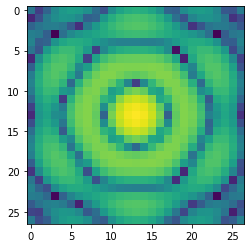

In [4]:
conf['add_phase'] = True
phase_screens, amp_screens, tiptilts, apo_misaligns, ls_misaligns = \
    heeps.wavefront.load_errors(verbose=True, **conf)
psf = heeps.wavefront.propagate_one(wf, phase_screen=phase_screens[0], onaxis=False, savefits=True, 
    verbose=True, **conf)
psf_OFF_crop, fwhm, ap_flux = psf_off_template(psf)
plt.imshow(np.log10(psf_OFF_crop));
print('fwhm=%.2fpix, ap_flux=%.2e'%(fwhm, ap_flux))

Off-axis PSF:
‾‾‾‾‾‾‾‾‾‾‾‾‾
Load phase screens from 'COMPASS_201810_RandomWind_100screens_meters.fits'
   nscreens=100 (nframes=100, nstep=1)
Create off-axis PSF cube
   preloading RAVC apodizer, apo_misalign=None
   preloading Lyot stop, ls_misalign=None
   2022-06-13 11:58:38, e2e simulation using 12 cores
   2022-06-13 11:58:57, completed in 19.12 seconds

fwhm=3.37pix, ap_flux=6.91e-02


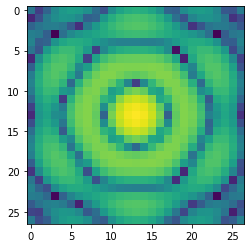

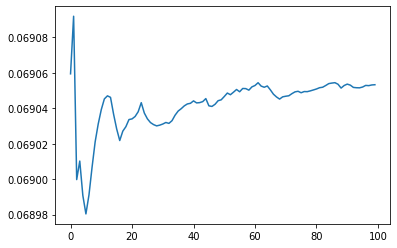

In [5]:
psfs = heeps.wavefront.propagate(wf, onaxis=False, savefits=False, verbose=True, **conf)
psf_arr, ap_arr = [], []
for i in range(1,101):
    psf = np.mean(psfs[:i], axis=0)
    _, _, ap_flux = psf_off_template(psf)
    psf_arr.append(psf)
    ap_arr.append(ap_flux)
psf = psf_arr[0]
psf_OFF_crop, fwhm, ap_flux = psf_off_template(psf)
plt.imshow(np.log10(psf_OFF_crop));
print('fwhm=%.2fpix, ap_flux=%.2e'%(fwhm, ap_flux))
plt.figure();plt.plot(ap_arr);

### All effects

In [6]:
conf.update(
    f_pupil = 'pupil/ELT_fullM1_3refl.fits',  # entrance pupil file
    add_point_err = True,
    add_apo_drift = True,
    add_amp = True,
    add_cl_vort = True,
)
conf = heeps.config.read_config(verbose=False, **conf)
conf = heeps.config.update_config(saveconf=True, verbose=True, **conf) 
wf = heeps.pupil.pupil(savefits=True, verbose=True, **conf)

Simulation config: band=L, mode=RAVC
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   ravc_calc=False, ravc_t=0.7909, ravc_r=0.5190
   npupil=285, pscale=5.4700 mas, lam=3.8112E-06 m
   hfov=1.1 arcsec (-> ndet=403, 51.74 lam/D)

Entrance pupil: loaded from 'ELT_fullM1_3refl.fits'
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾


Off-axis PSF:
‾‾‾‾‾‾‾‾‾‾‾‾‾
Load phase screens from 'COMPASS_201810_RandomWind_100screens_meters.fits'
   nscreens=100 (nframes=100, nstep=1)
Load amp screens from 'Talbot_LM_20201120_IMGP_meridian_allglass.fits'
   nscreens=1
Load pointing errors from 'point_all_3600s_300ms_L.fits'
   nscreens=100
Load apodizer drift=0.02 % ptv
Create off-axis PSF cube
   adding chromatic leakage at vortex plane: 0.002
   preloading amplitude screen
   preloading Lyot stop, ls_misalign=None
   2022-06-13 11:59:00, e2e simulation using 12 cores
   2022-06-13 11:59:20, completed in 19.58 seconds

fwhm=3.36pix, ap_flux=6.92e-02


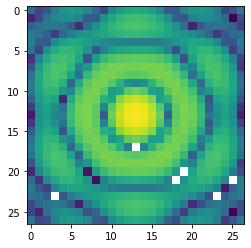

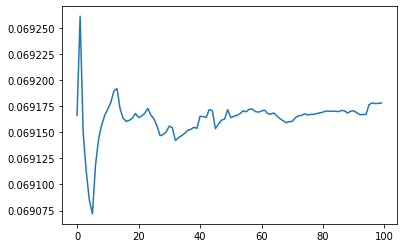

In [7]:
psfs = heeps.wavefront.propagate(wf, onaxis=False, savefits=False, verbose=True, **conf)
psf_arr, ap_arr = [], []
for i in range(1,101):
    psf = np.mean(psfs[:i], axis=0)
    _, _, ap_flux = psf_off_template(psf)
    psf_arr.append(psf)
    ap_arr.append(ap_flux)
psf = psf_arr[0]
psf_OFF_crop, fwhm, ap_flux = psf_off_template(psf)
plt.imshow(np.log10(psf_OFF_crop));
print('fwhm=%.2fpix, ap_flux=%.2e'%(fwhm, ap_flux))
plt.figure();plt.plot(ap_arr);